# Personal Task
### of "Data processing software"
### Student IAB-11
### Bovsunovska Mariia

###  
### General information
The task is to provide Exploratory Data Analysis on an arbitrary data set.

Sections of the report
1. Dataset description. Also should include variables description with units and dataset
credits.
2. Data reading. Also could include data merging.
3. Data tidying.
4. Data analyzing with graphics.


###  
### Dataset description. Also should include variables description with units and dataset credits. 
###  

###### Airly_reportGenerator.table.title_Київ_01_01_2019-14_11_2022_14_11_2022, 12_24

Опис: Цей набір даних містить показники та чинники забруднення повітря на Києвом
та метеорологічні дані міста Києва за даними датчиків компанії Airly. 

Географія даних: Київ

Часовий проміжок даних: кожен день з 2019-09-16 по 2022-11-16

Джерело: Цей набір даних отримано за допомогою сервісу Airly (https://airly.org/map/en/).

Кількість записів: 1156 рядків

Кільуість колонок: 16

In [1]:
# From            object (timestamp)            часова мітка початку проміжку знятих показників
# Till            object (timestamp)            часова мітка кінця проміжку знятих показників
# Airly CAQI       int64                        Air Quality Index за оцінками Airly
# PM10             int64                        кількість пилинок розміром 10 мікрон у молях
# PM25             int64                        кількість пилинок розміром 25 мікрон у молях
# PM1              int64                        кількість пилинок розміром 1 мікрон у молях
# NO2            float64                        неорганічна сполука складу NO2 (оксид азоту) у молях
# NO             float64                        неорганічна сполука складу NO (несолевий оксид азоту) у молях
# O3             float64                        алотропна модифікація оксигену О3 (озон) у молях
# CO             float64                        хімічна сполука складу NO (монооксид вуглецю) у молях
# SO2            float64                        сполука сірки з оксигеном складу SO2 (оксид сірки) у молях
# H2S            float64                        хімічна сполука з формулою H2S (сірководень) у молях
# TEMPERATURE      int64                        температура у градусах цельсія
# WIND            object (array [char, int] )   напрямок та швидкість вітру у м/c
# PRESSURE         int64                        тиск у гектопаскалях
# HUMIDITY         int64                        відносна вологість у відсотках

* Колонки NO, CO, SO2, H2S мають тільки NaN значення. Це пов'язано з тим, що в інших містах (переважно в Польші) стоять такі даткики, але в Києві відсутні.
* Колонки NO2 та O3 мають меншу кількість записів (704). Це пов'язано з тим, що проміжок часу, в який ці датчики генерували інформацію, коротший, бо їх було встановлено та активовано пізніше ніж пилові датчики.

Приклад даних:

In [2]:
#                            From                           Till  Airly CAQI  \
# 0  2019-09-16T03:00:00.000+03:00  2019-09-17T03:00:00.000+03:00          15   
# 1  2019-09-17T03:00:00.000+03:00  2019-09-18T03:00:00.000+03:00          23   
# 2  2019-09-18T03:00:00.000+03:00  2019-09-19T03:00:00.000+03:00           9   
# 3  2019-09-19T03:00:00.000+03:00  2019-09-20T03:00:00.000+03:00          10   
# 4  2019-09-20T03:00:00.000+03:00  2019-09-21T03:00:00.000+03:00          18   
# 5  2019-09-21T03:00:00.000+03:00  2019-09-22T03:00:00.000+03:00          21   

#    PM10  PM25  PM1  NO2  NO  O3  CO  SO2  H2S  TEMPERATURE WIND  PRESSURE  \
# 0    10     9    6  NaN NaN NaN NaN  NaN  NaN           21    —      1011   
# 1    14    14   10  NaN NaN NaN NaN  NaN  NaN           15    —      1009   
# 2     6     5    4  NaN NaN NaN NaN  NaN  NaN           12    —      1008   
# 3     6     6    4  NaN NaN NaN NaN  NaN  NaN           10    —      1018   
# 4    11    11    7  NaN NaN NaN NaN  NaN  NaN            7    —      1020   
# 5    13    13    8  NaN NaN NaN NaN  NaN  NaN            9    —      1022   

#    HUMIDITY  
# 0        38  
# 1        41  
# 2        68  
# 3        71  
# 4        75  
# 5        66  

###  
### Data reading. Also could include data merging.
###  

Для початку завантажимо необхідні бібліотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Считаємо дані в змінну за використанням бібліотеки pandas. 

In [2]:
df = pd.read_csv("Airly_reportGenerator.table.title_Київ_01_01_2019-14_11_2022_14_11_2022, 12_24.csv")

In [3]:
df

,From,Till,Airly CAQI,PM10,PM25,PM1,NO2,NO,O3,CO,SO2,H2S,TEMPERATURE,WIND,PRESSURE,HUMIDITY
0,2019-09-16T03:00:00.000+03:00,2019-09-17T03:00:00.000+03:00,15,10,9,6,NaN,NaN,NaN,NaN,NaN,NaN,21,—,1011,38
1,2019-09-17T03:00:00.000+03:00,2019-09-18T03:00:00.000+03:00,23,14,14,10,NaN,NaN,NaN,NaN,NaN,NaN,15,—,1009,41
2,2019-09-18T03:00:00.000+03:00,2019-09-19T03:00:00.000+03:00,9,6,5,4,NaN,NaN,NaN,NaN,NaN,NaN,12,—,1008,68
3,2019-09-19T03:00:00.000+03:00,2019-09-20T03:00:00.000+03:00,10,6,6,4,NaN,NaN,NaN,NaN,NaN,NaN,10,—,1018,71
4,2019-09-20T03:00:00.000+03:00,2019-09-21T03:00:00.000+03:00,18,11,11,7,NaN,NaN,NaN,NaN,NaN,NaN,7,—,1020,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2022-11-10T02:00:00.000+02:00,2022-11-11T02:00:00.000+02:00,40,30,24,14,32.0,NaN,40.0,NaN,NaN,NaN,7,SSE 13,1024,83
1152,2022-11-11T02:00:00.000+02:00,2022-11-12T02:00:00.000+02:00,32,24,19,11,41.0,NaN,30.0,NaN,NaN,NaN,8,ENE 9,1028,89
1153,2022-11-12T02:00:00.000+02:00,2022-11-13T02:00:00.000+02:00,27,20,16,10,37.0,NaN,54.0,NaN,NaN,NaN,8,E 14,1029,81
1154,2022-11-13T02:00:00.000+02:00,2022-11-14T02:00:00.000+02:00,22,6,5,3,35.0,NaN,52.0,NaN,NaN,NaN,8,NE 14,1029,84


Зчитування пройшло успішно.

###  
### Data tidying.
###  

Проведемо "розчісування" даних. В даному випадку: 
- розбивання типів даних object (масивів значень) на окремі значення,
- перейменування певних стовбчиків і чистка помилок читання файлу, 
- видалення пустих колонок.

Проведемо розбиття та чистку даних формату timestamp.

In [4]:
df['From'] = df['From'].str.split('T').str[0]
df['Till'] = df['Till'].str.split('T').str[0]

new = df["From"].str.split('-', expand = True)
df["Year_f"] = new[0]
df["Month_f"] = new[1]
df["Day_f"] = new[2]

new = df["Till"].str.split('-', expand = True)
df["Year_t"] = new[0]
df["Month_t"] = new[1]
df["Day_t"] = new[2]

Проведемо чистку та розбиття даних колонки WIND формату array.

In [5]:
df["WIND"].loc[(df["WIND"] == " —" )] = " "

new = df["WIND"].str.split(' ', expand = True)
df["WIND_direction"] = new[0]
df["WIND_strength"] = new[1]

df["WIND_strength"].loc[(df["WIND_strength"] == "" )] = float("nan")
df["WIND_strength"] = pd.to_numeric(df["WIND_strength"])

<ipython-input-5-bf65dce5d1e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WIND"].loc[(df["WIND"] == " —" )] = " "
<ipython-input-5-bf65dce5d1e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WIND_strength"].loc[(df["WIND_strength"] == "" )] = float("nan")


Проводимо перейменування колонки, назва якої була прочитана із помилкою

In [6]:
df["AirlyCAQI"] = df["Airly\xa0CAQI"]

Видаляємо колонки, які більше не потрібні

In [7]:
df = df.drop(['From', 'Till', "Airly\xa0CAQI", 'NO', 'CO', 'SO2', 'H2S', "WIND"], axis=1)

Наступні колонки залишилися у наборі даних.

In [8]:
print(list(df.keys()))

['PM10', 'PM25', 'PM1', 'NO2', 'O3', 'TEMPERATURE', 'PRESSURE', 'HUMIDITY', 'Year_f', 'Month_f', 'Day_f', 'Year_t', 'Month_t', 'Day_t', 'WIND_direction', 'WIND_strength', 'AirlyCAQI']


Далі наведено приклад значень даних.

In [9]:
print(df)

      PM10  PM25  PM1   NO2    O3  TEMPERATURE  PRESSURE  HUMIDITY Year_f  \
0       10     9    6   NaN   NaN           21      1011        38   2019   
1       14    14   10   NaN   NaN           15      1009        41   2019   
2        6     5    4   NaN   NaN           12      1008        68   2019   
3        6     6    4   NaN   NaN           10      1018        71   2019   
4       11    11    7   NaN   NaN            7      1020        75   2019   
...    ...   ...  ...   ...   ...          ...       ...       ...    ...   
1151    30    24   14  32.0  40.0            7      1024        83   2022   
1152    24    19   11  41.0  30.0            8      1028        89   2022   
1153    20    16   10  37.0  54.0            8      1029        81   2022   
1154     6     5    3  35.0  52.0            8      1029        84   2022   
1155    11    10    6  28.0  39.0            4      1030        86   2022   

     Month_f Day_f Year_t Month_t Day_t WIND_direction  WIND_strength  \
0 

Для числових стовбців розраховано статистичні показники для загального огляду.

In [10]:
print(df.describe())

              PM10         PM25          PM1         NO2          O3  \
count  1156.000000  1156.000000  1156.000000  704.000000  704.000000   
mean     22.756055    18.032872    11.139273   80.859375   65.833807   
std      16.617187    13.622453     7.840762   52.650719   43.405717   
min       0.000000     0.000000     0.000000    0.000000    0.000000   
25%      11.000000     9.000000     6.000000   32.750000   31.000000   
50%      18.000000    14.000000     9.000000   73.500000   53.000000   
75%      31.000000    24.000000    14.000000  128.000000   94.000000   
max     172.000000   152.000000    88.000000  213.000000  204.000000   

       TEMPERATURE     PRESSURE     HUMIDITY  WIND_strength    AirlyCAQI  
count  1156.000000  1156.000000  1156.000000    1113.000000  1156.000000  
mean      9.558824  1017.442042    76.364187      11.586703    42.242215  
std       9.018259     7.926454    13.013602       5.097775    18.014765  
min     -15.000000   992.000000    34.000000       

З опису вище можна знову звернути увагу, що не усі колонки повністю заповнені.
* Колонки NO2 та O3 мають 704 записи.
* WIND_strength має 1113 записів

###  
### Data analyzing with graphics.
###  

Сформуємо менший набір для простоти та зручності подальшого використання. Та проведемо декілька досліджень на його основі.

In [11]:
df_1 = df[["Year_f", "Month_f", 'PM1', "PM10", "PM25", "AirlyCAQI"]]

Побудуємо графік, що відображатиме якість повітря у порівнянні між роками за місяцями.

In [12]:
df_1p = df_1.pivot_table(index='Month_f', \
                     columns="Year_f", \
                     values="AirlyCAQI", \
                     aggfunc='mean')

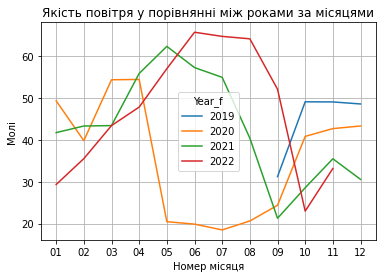

In [13]:
df_1p.plot(
    xlabel = "Номер місяця", \
    xticks = range(0,len(df_1p.index)), \
    ylabel = "Молі", \
    grid = True, \
    title = "Якість повітря у порівнянні між роками за місяцями")

З цього графіка чітко видно, що рік року рознь. Місячні залежності не очевидні або відсутні.

Далі спробуємо подивитися на пилові частинки у часі.

In [14]:
df_2p = df.pivot_table(index=["Year_f",'Month_f',"Day_f"], \
                     columns=[], \
                     values=["PM10", "PM25", "PM1"], \
                     aggfunc='mean')

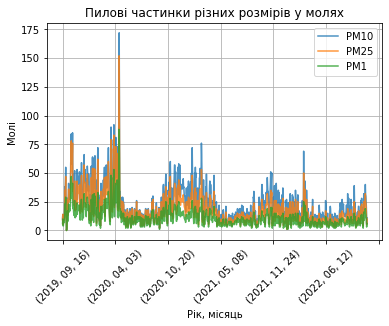

In [15]:
df_2p.plot(
        y=["PM10", "PM25", "PM1"],
        alpha=0.8,
        rot=45, 
        xlabel = "Рік, місяць", 
        ylabel = "Молі",
        grid = True,
        title = "Пилові частинки різних розмірів у молях")

Із графіку вище чітко видно викиди в районах 2020-04 та 2022-03.

Розглянемо цей же графік, але групований за місяцями.

In [16]:
df_3p = df_1.pivot_table(index=["Year_f",'Month_f'], \
                     columns=[], \
                     values=["PM1", "PM10", "PM25"], \
                     aggfunc='mean')

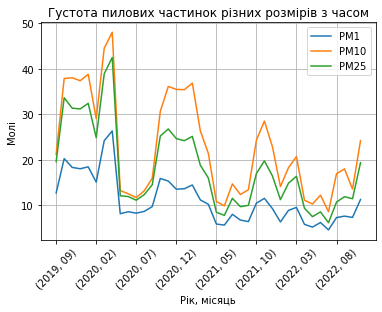

In [17]:
df_3p.plot(rot=45, \
           xlabel = "Рік, місяць", \
           ylabel = "Молі", \
           grid = True, \
           title = "Густота пилових частинок різних розмірів з часом")
plt.show()

Також цікавим відкриттям для мене стало на графіку, групованому за місяцями, те, що пилинок розміру 1 мікрон стабільно менше. Це є незвичним особисто для мене, бо у світі пилинок логіка "чим менші, тим їх більше" здавалася очевидною.

До речі, також, здається наче тренд тут від'ємний.

Також коливання у кількості пилинок у повітрі вказують на сезонність, тому проведемо перевірку.

In [18]:
df_4p = df.pivot_table(index='Month_f', \
                     columns=[], \
                     values=["PM1", "PM10", "PM25"], \
                     aggfunc='mean')

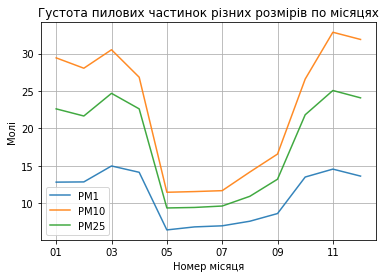

In [19]:
df_4p.plot(xlabel = "Номер місяця", \
           y=["PM1", "PM10", "PM25"], \
           ylabel = "Молі",\
           grid = True,\
           alpha=0.9,\
           rot=0,\
          title ="Густота пилових частинок різних розмірів по місяцях")

Цей графік підтримує ідею про сезонність. За середніми показниками, у повітрі стабільно менше пилу у теплі місяці. 

Цікаво, чи змінюється співвідношення пилинок різних розмірів...

Сформуємо графік іншого формату. Формату метеорологічних даних, які також мають сезонність, але прояви особливостей часових рядів у них не такі значні.

In [20]:
df_5p = df.pivot_table(index='Month_f', \
                     columns=[], \
                     values=['TEMPERATURE', 'PRESSURE', 'HUMIDITY'], \
                     aggfunc='mean')

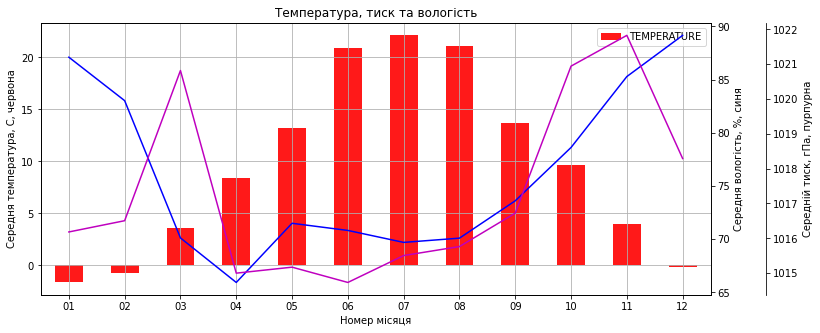

In [21]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Температура, тиск та вологість')
ax2 = ax.twinx()
ax3 = ax.twinx()

df_5p.plot(xlabel = "Номер місяця", \
           y=['TEMPERATURE'], \
           ylabel = "Температура",\
           ax=ax, \
           kind='bar', \
           color='r',\
           grid = True,\
           alpha=0.9,\
           rot=0)
ax.set_xticks(range(0,len(df_5p.index)))
ax.set_ylabel('Середня температура, С, червона')

ax2.plot(ax.get_xticks(), \
         df_5p['HUMIDITY'],
         label = "Вологість",\
         color='b')
ax2.set_ylabel('Середня вологість, %, синя')
ax3.spines['right'].set_position(("data", 11.5))

ax3.plot(ax.get_xticks(),\
         df_5p['PRESSURE'],\
         label = "Тиск",\
         color='m')
ax3.set_ylabel('Середній тиск, гПа, пурпурна')
ax3.spines['right'].set_position(("data", 12.5))

plt.show()

На цьому графіку зображено сезонність метеорологічних даних. До речі, що незвично - показник середнього тиску в березні (03) має дуже нестандартний шпиль. Потенційно це може бути викидом, адже для усереднення бралося значення лише за чотири роки.

Побудуємо кореляційну матрицю для усіх (числових) даних із використанням двох методів.

In [22]:
pearson = round(df.corr(method='pearson'),2)
spearman = round(df.corr(method='spearman'),2)

<ipython-input-22-7deb6e9fffbf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson = round(df.corr(method='pearson'),2)
<ipython-input-22-7deb6e9fffbf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman = round(df.corr(method='spearman'),2)


Кореляція Пірсона


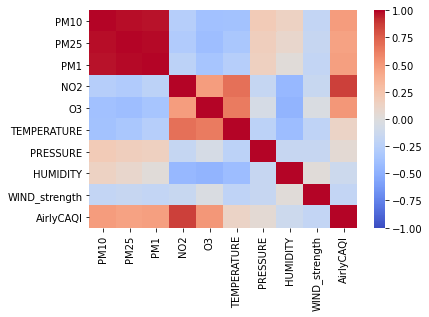

In [23]:
sns.heatmap(pearson, vmin=-1, vmax=1, cmap="coolwarm")
print("Кореляція Пірсона")
plt.savefig('Airly_heatmap_correlation.png', dpi=300)


Цікаво, що якість повітря CAQI, як показник, 
залежить від багатьох факторів, але має сильну кореляцію із NO2.
І в той же час NO2 має середню кореляцію із колонкою температури.

In [26]:
Також, тут чітко видно, що пил різного розміру сильно корелює і наврядчи для подальшого аналізу є сенс використувати усі три колонки.
Для задач, які хитаються від сильної кореляції вхідних даних має сенс лишити тільки одну колонку з пилом.

SyntaxError: invalid syntax (<ipython-input-26-e5b9a257cae0>, line 1)

Кореляція Спірмена


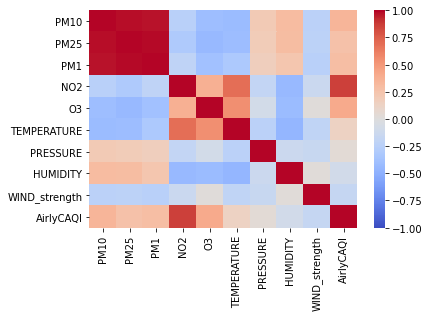

In [24]:
sns.heatmap(spearman, vmin=-1, vmax=1, cmap="coolwarm")
print("Кореляція Спірмена")

- Дуже сильна кореляція між показниками пилу різного розміру. 
- У обидвох матрицях можна помітити суттєвий зв'язок між значеннями NO2 та AirlyCAQI. 

Відчувається, що методи близькі у значеннях, але трошки відрізняються, то наскільки?

Різниця методів розрахунку кореляції


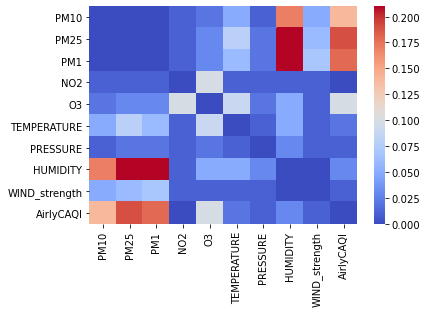

In [25]:
corr_difference = abs(abs(pearson) - abs(spearman))
sns.heatmap(corr_difference, vmin=0, cmap="coolwarm")
print("Різниця методів розрахунку кореляції")

Найбільша різниця у значеннях складає 0.2, що потенційно змінює зв'язок із "відсутнього" до "слабкого", із "слабкого" до "середнього", із "середнього" до "сильного", із "сильного" до "дуже сильного". Це насправді досить багато, я не очікувала подібної різниці. 

Цікаво, що найбільша різниця розрахунку кореляції пов`язана із пилом та його взаємодією із вологістю та AirQualityIndex.

### Висновки

В ході даної роботи було проведено аналітику до даних, що містять показники та чинники забруднення повітря над Києвом та метеорологічні дані міста Києва. 
- Осмислено, що якість повітря CAQI, як показник, залежить від багатьох факторів, але має сильну кореляцію із NO2, який є не для усіх даних, що суттєво впливає на аналіз даних та якості повітря в рядках, де показник NO2 не відомий. 
- Побудовано графік для виявлення викидів по обсягах пилу. В подальшій роботі потрібно продовжити працювати над виявленням викидів. Набір даних у вигляді часового ряду досить сильно відрізняється у подібному аналізі від інших видів даних.
- Виявлено сезонність у обсягах пилу - за середніми показниками, у повітрі стабільно менше пилу у теплі місяці.
- Виявлено, що пилу розміром 1 мікрон датчики відмітили менше за обсягами ніж пилу розмірів 10 та 25 мікрон.
- Виявлено, що пил різного розміру сильно корелює між собою і наврядчи для подальшого аналізу є сенс використувати усі три колонки. Для задач, які хитаються від сильної кореляції вхідних даних, має сенс лишити тільки одну колонку з пилом.
- Для подальшого аналізу побудовано графік сезонних змін метеорологічних даних для міста Києва. 

